In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [131]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [132]:
df.shape

(520, 17)

In [133]:
df['Gender'].replace(['Male','Female'],[1,0],inplace=True)

Polyuria
No     262
Yes    258
Name: Polyuria, dtype: int64


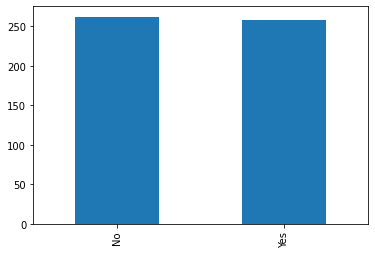


Polydipsia
No     287
Yes    233
Name: Polydipsia, dtype: int64


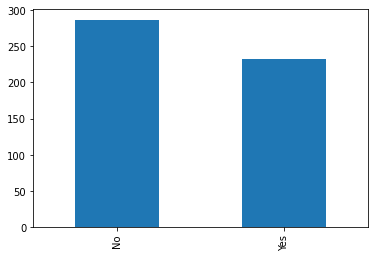


sudden weight loss
No     303
Yes    217
Name: sudden weight loss, dtype: int64


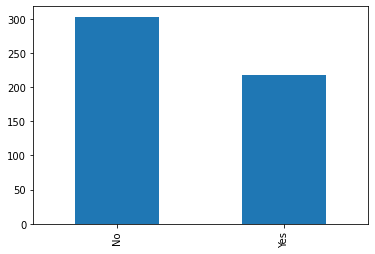


weakness
Yes    305
No     215
Name: weakness, dtype: int64


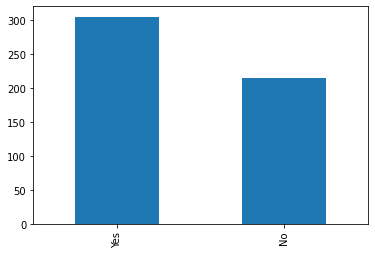


Polyphagia
No     283
Yes    237
Name: Polyphagia, dtype: int64


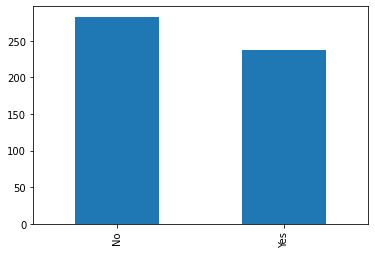


Genital thrush
No     404
Yes    116
Name: Genital thrush, dtype: int64


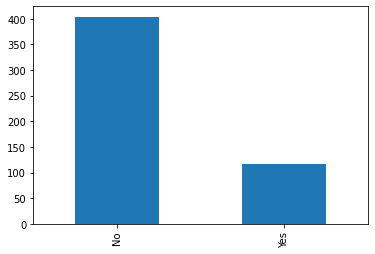


visual blurring
No     287
Yes    233
Name: visual blurring, dtype: int64


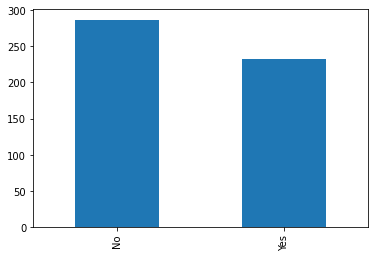


Itching
No     267
Yes    253
Name: Itching, dtype: int64


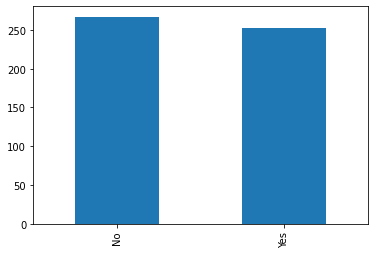


Irritability
No     394
Yes    126
Name: Irritability, dtype: int64


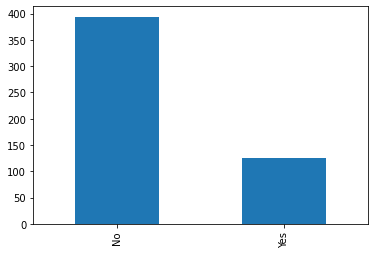


delayed healing
No     281
Yes    239
Name: delayed healing, dtype: int64


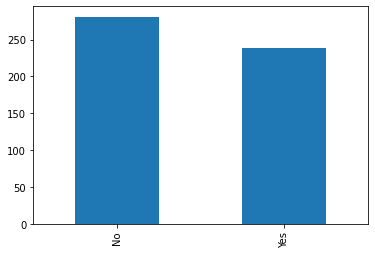


partial paresis
No     296
Yes    224
Name: partial paresis, dtype: int64


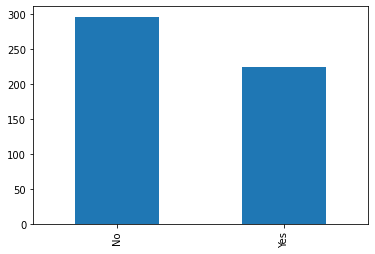


muscle stiffness
No     325
Yes    195
Name: muscle stiffness, dtype: int64


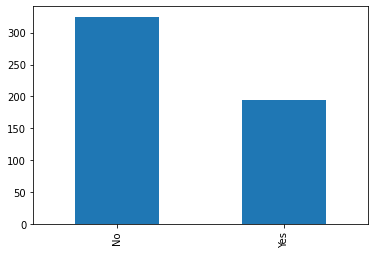


Alopecia
No     341
Yes    179
Name: Alopecia, dtype: int64


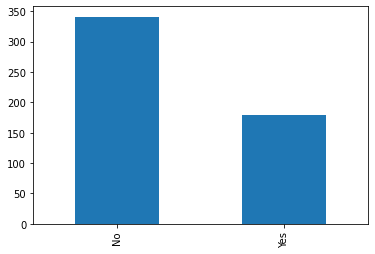


Obesity
No     432
Yes     88
Name: Obesity, dtype: int64


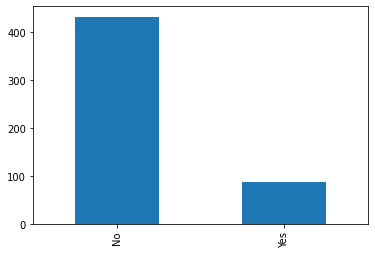

In [134]:
for col in df.columns[2:16]:
    print(col)
    df[col].value_counts().plot(kind='bar')
    print(df[col].value_counts())
    plt.show()
    print()

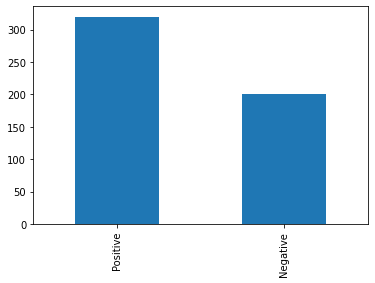

In [135]:
df['class'].value_counts().plot(kind='bar')
plt.show()

In [136]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [137]:
for col in df.columns[2:16]:
    df[col].replace(['Yes','No'],[1,0], inplace=True)

In [138]:
df['class'].replace(['Positive','Negative'],[1,0],inplace=True)

In [139]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [140]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [141]:
pos_data = (df['class']==1)
pos_data = df.loc[pos_data]
pos_data.index = [i for i in range(320)]
pos_data = pos_data.loc[0:200]
pos_data.shape

(201, 17)

In [142]:
neg_data = (df['class']==0)
neg_data = df.loc[neg_data]
neg_data.shape

(200, 17)

In [143]:
df = pd.concat([pos_data,neg_data], axis=0)

In [144]:
df.shape

(401, 17)

In [145]:
x_data = df[df.columns[0:16]]
y_data = df['class']

In [146]:
x_data.shape

(401, 16)

In [147]:
y_data.shape

(401,)

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3)

In [149]:
x_train.shape

(280, 16)

In [150]:
x_test.shape

(121, 16)

In [151]:
y_train.shape

(280,)

In [152]:
y_test.shape

(121,)

In [224]:
model = SVC(kernel='linear',probability=True,C=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.9256198347107438

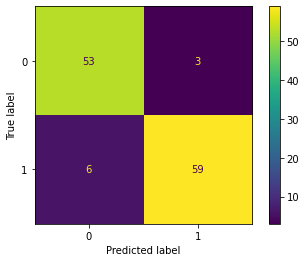

In [225]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [226]:
model.score(x_train,y_train)

0.9321428571428572

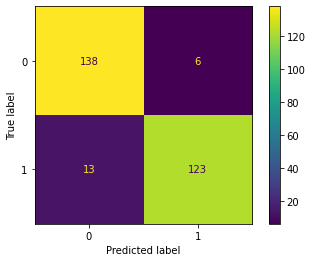

In [227]:
plot_confusion_matrix(model,x_train,y_train)
plt.show()

In [191]:
model.predict_proba([x_data.loc[1]])

array([[0.85189166, 0.14810834]])

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
for i in range(9,30,2):
    model_k = KNeighborsClassifier(n_neighbors=i)
    model_k.fit(x_train,y_train)
    print('n_neighbors:',i)
    test = (model_k.score(x_test,y_test))
    train = (model_k.score(x_train,y_train))
    print('test:',test)
    print('train:',train)
    print()
    print()

n_neighbors: 9
test: 0.768595041322314
train: 0.8392857142857143


n_neighbors: 11
test: 0.7355371900826446
train: 0.8107142857142857


n_neighbors: 13
test: 0.7024793388429752
train: 0.7821428571428571


n_neighbors: 15
test: 0.71900826446281
train: 0.7607142857142857


n_neighbors: 17
test: 0.6942148760330579
train: 0.7642857142857142


n_neighbors: 19
test: 0.7272727272727273
train: 0.7535714285714286


n_neighbors: 21
test: 0.7272727272727273
train: 0.7428571428571429


n_neighbors: 23
test: 0.71900826446281
train: 0.7392857142857143


n_neighbors: 25
test: 0.7272727272727273
train: 0.7178571428571429


n_neighbors: 27
test: 0.7520661157024794
train: 0.7071428571428572


n_neighbors: 29
test: 0.7355371900826446
train: 0.7392857142857143




In [197]:
#RBF prediction score is <60
for i in [1,3,5,10]:
    model_s = SVC(C=i,kernel='linear',gamma='auto')
    model_s.fit(x_train,y_train)
    print('C:',i)
    test = (model_s.score(x_test,y_test))
    train = (model_s.score(x_train,y_train))
    print('test:',test)
    print('train:',train)
    print()
    print()

C: 1
test: 0.9173553719008265
train: 0.9321428571428572


C: 3
test: 0.9173553719008265
train: 0.9321428571428572


C: 5
test: 0.9256198347107438
train: 0.9321428571428572


C: 10
test: 0.9256198347107438
train: 0.9428571428571428




In [229]:
import joblib 
joblib.dump(model,'model_early_diabetes')

['model_early_diabetes']

In [232]:
m = joblib.load('model_early_diabetes')
m.predict_proba([x_data.loc[1]])*100

array([[90.18710768,  9.81289232]])